# Feature Engineering and Modelling




In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [3]:
df = pd.read_csv('data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling



In [11]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

### Data sampling


In [5]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [14]:
print(y.value_counts(normalize=True))

churn
0    0.902848
1    0.097152
Name: proportion, dtype: float64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training



In [15]:
model = RandomForestClassifier(n_estimators=100, max_depth=10,class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

### Evaluation



In [16]:
# Generate predictions 
y_pred = model.predict(X_test)

In [17]:
# Calculate performance metrics 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8318729463307777
Precision: 0.21428571428571427
Recall: 0.2540983606557377
F1 Score: 0.2325

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      3286
           1       0.21      0.25      0.23       366

    accuracy                           0.83      3652
   macro avg       0.56      0.58      0.57      3652
weighted avg       0.84      0.83      0.84      3652



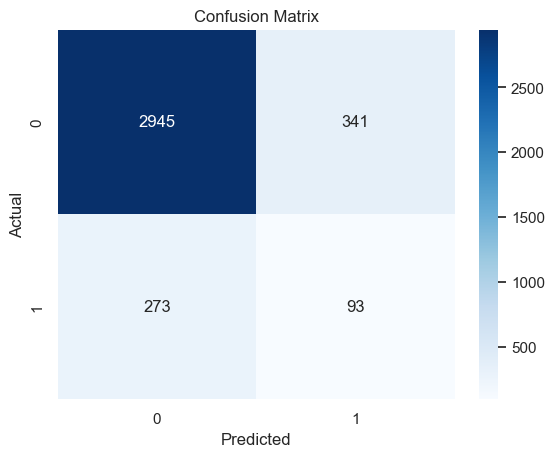

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Model Evaluation & Justification

Initially, the model had high accuracy (90%) but failed to identify churners, with a recall of only 1.4%. Given the business importance of detecting churn, this was unacceptable.

After addressing the class imbalance using `class_weight='balanced'`, the model's recall improved significantly to 25.4%, with a precision of 21% and an F1 score of 0.23. While accuracy dropped slightly to ~83%, this trade-off is justified, as the model now captures a meaningful portion of churners, which is critical for proactive retention strategies.

We chose metrics like **precision**, **recall**, and **F1-score** because:
- **Accuracy** is misleading in imbalanced data.
- **Recall** is key in churn detection — we must catch as many churners as possible.
- **Precision** ensures we're not targeting too many false positives.
- **F1 score** balances both, giving a better single-score metric of performance.

We believe the model is now performing **satisfactorily**, though further tuning or more sophisticated methods (e.g., XGBoost, feature selection, or better sampling) could improve it further.
